<p>&nbsp;</p>
<table>
<tbody>
<tr>
<td>
<p><strong>Author(s) Name</strong></p>
</td>
<td>The Machine Learners</td>
</tr>
<tr>
<td>
<p><strong>Model&rsquo;s Title</strong></p>
</td>
<td>OsloMet Summer Course Big Data Analytics Project</td>
</tr>
<tr>
<td>
<p><strong>Purpose</strong></p>
</td>
<td>Predicting Violent Crime in a Community in USA</td>
</tr>
<tr>
<td colspan="2">
<p><strong>Versioning:</strong></p>
<br />
<table>
<tbody>
<tr>
<td>
<p><span style="font-weight: 400;">Version Number</span></p>
</td>
<td>
<p><span style="font-weight: 400;">Description</span></p>
</td>
<td>
<p><span style="font-weight: 400;">Owner</span></p>
</td>
<td>
<p><span style="font-weight: 400;">Date</span></p>
</td>
<td>
<p><span style="font-weight: 400;">Comments</span></p>
</td>
</tr>
<tr>
<td>v.1.0</td>
<td>Draft</td>
<td>Team</td>
<td>2019-07-05</td>
<td>Features: Income, Household, Geo-spatial features</td>
</tr>
<tr>
<td>v.1.1</td>
<td>Data Cleansing</td>
<td>Team</td>
<td>2019-07-05</td>
<td>Features: Fixing object-numeric conversions, missing values</td>
</tr>
</tbody>
</table>
</td>
</tr>
</tbody>
</table>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)

In [31]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',header=None)
df.columns = ['communityname', 'State', 'countyCode', 'communityCode', 'fold', 'pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup', 'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm', 'houseVacant', 'pctHousOccup', 'pctHousOwnerOccup', 'pctVacantBoarded', 'pctVacant6up', 'medYrHousBuilt', 'pctHousWOphone', 'pctHousWOplumb', 'ownHousLowQ', 'ownHousMed', 'ownHousUperQ', 'ownHousQrange', 'rentLowQ', 'rentMed', 'rentUpperQ', 'rentQrange', 'medGrossRent', 'medRentpctHousInc', 'medOwnCostpct', 'medOwnCostPctWO', 'persEmergShelt', 'persHomeless', 'pctForeignBorn', 'pctBornStateResid', 'pctSameHouse-5', 'pctSameCounty-5', 'pctSameState-5', 'numPolice', 'policePerPop', 'policeField', 'policeFieldPerPop', 'policeCalls', 'policCallPerPop', 'policCallPerOffic', 'policePerPop2', 'racialMatch', 'pctPolicWhite', 'pctPolicBlack', 'pctPolicHisp', 'pctPolicAsian', 'pctPolicMinority', 'officDrugUnits', 'numDiffDrugsSeiz', 'policAveOT', 'landArea', 'popDensity', 'pctUsePubTrans', 'policCarsAvail', 'policOperBudget', 'pctPolicPatrol', 'gangUnit', 'pctOfficDrugUnit', 'policBudgetPerPop', 'murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop']
df_orig = df.copy()
df.head(5)


,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,6.5,1845.9,9.63,?,?,?,?,0.0,?,0,0.0,0,0,1,8.2,4,32.81,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2186.7,3.84,?,?,?,?,0.0,?,0,0.0,1,4.25,5,21.26,24,102.05,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2780.9,4.37,?,?,?,?,0.0,?,3,8.3,6,16.6,56,154.95,14,38.74,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443

In [32]:
#Fixing missing vlaues with valid NaNs
df = df.replace('?',np.nan)

In [33]:
#Convert object columns that were supposed to be numeric to numeric
for col in df.select_dtypes('object').columns:
    if col not in ['communityname', 'State', 'countyCode', 'communityCode']:
        df[col] = pd.to_numeric(df[col])

<h2>Fixing Missing Values</h2>

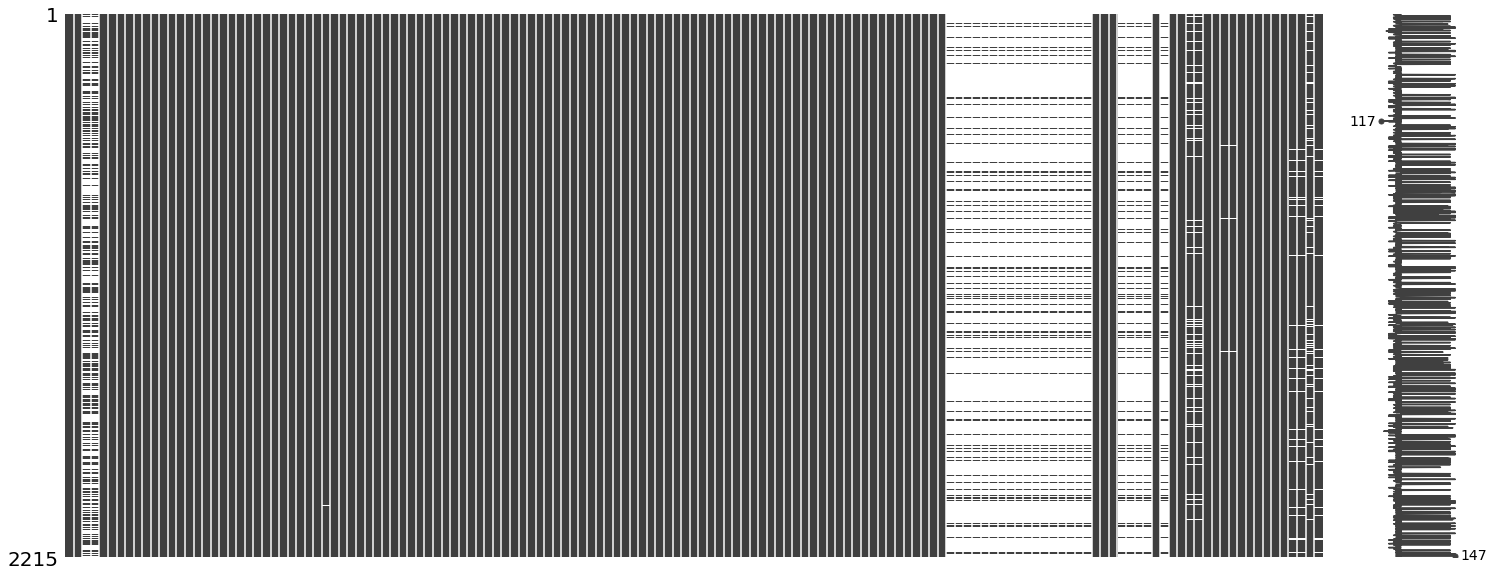

In [5]:
%matplotlib inline
import missingno as msno
msno.matrix(df)

In [6]:
from sklearn.preprocessing import Imputer
imp  = Imputer(missing_values=np.nan,strategy="mean",axis=0)
df.iloc[:,5:] = imp.fit_transform(df.iloc[:,5:])
df.head(5)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980.0,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980.0,100.0,75122.0,89.24,1.55,70.20,23.62,1.03,18.39,79584.0,29711.0,30233.0,13600.0,5725.0,27101.0,5115.0,22838.0,227.0,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31.0,0.36,1277.0,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3.0,64.0,98.37,91.01,3.12,37.50,1959.0,0.00,0.28,215900.0,262600.0,326900.0,111000.0,685.0,1001.0,1001.0,316.0,1001.0,23.8,21.1,14.0,11.0,0.0,10.66,53.72,65.29,78.09,89.14,499.198251,246.490962,432.559767,210.844781,252404.988338,120651.718892,523.658309,246.493586,85.499679,82.515831,9.263294,5.459767,0.681283,15.242245,26.28863,8.816327,119.114286,6.5,1845.9,9.63,185.478134,3.217602e+07,87.130933,4.285714,0.0,153577.871224,0.0,0.0,0.000000,0.00000,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.410000,41.020000,1394.590000
1,Marpletownship,PA,45,47616,1,23123.0,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123.0,100.0,47917.0,78.99,1.11,64.11,35.50,2.75,22.85,55323.0,20148.0,20191.0,18137.0,0.0,20074.0,5250.0,12222.0,885.0,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43.0,0.24,1920.0,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3.0,240.0,97.15,84.88,0.00,18.33,1958.0,0.31,0.14,136300.0,164200.0,199900.0,63600.0,467.0,560.0,672.0,205.0,627.0,27.6,20.7,12.5,0.0,0.0,8.30,77.17,71.27,90.22,96.12,499.198251,246.490962,432.559767,210.844781,252404.988338,120651.718892,523.658309,246.493586,85.499679,82.515831,9.263294,5.459767,0.681283,15.242245,26.28863,8.816327,119.114286,10.6,2186.7,3.84,185.478134,3.217602e+07,87.130933,4.285714,0.0,153577.871224,0.0,0.0,1.000000,4.25000,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.560000,1955.950000
2,Tigardcity,OR,NaN,NaN,1,29344.0,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344.0,100.0,35669.0,82.00,1.15,55.73,22.25,2.94,14.56,42112.0,16

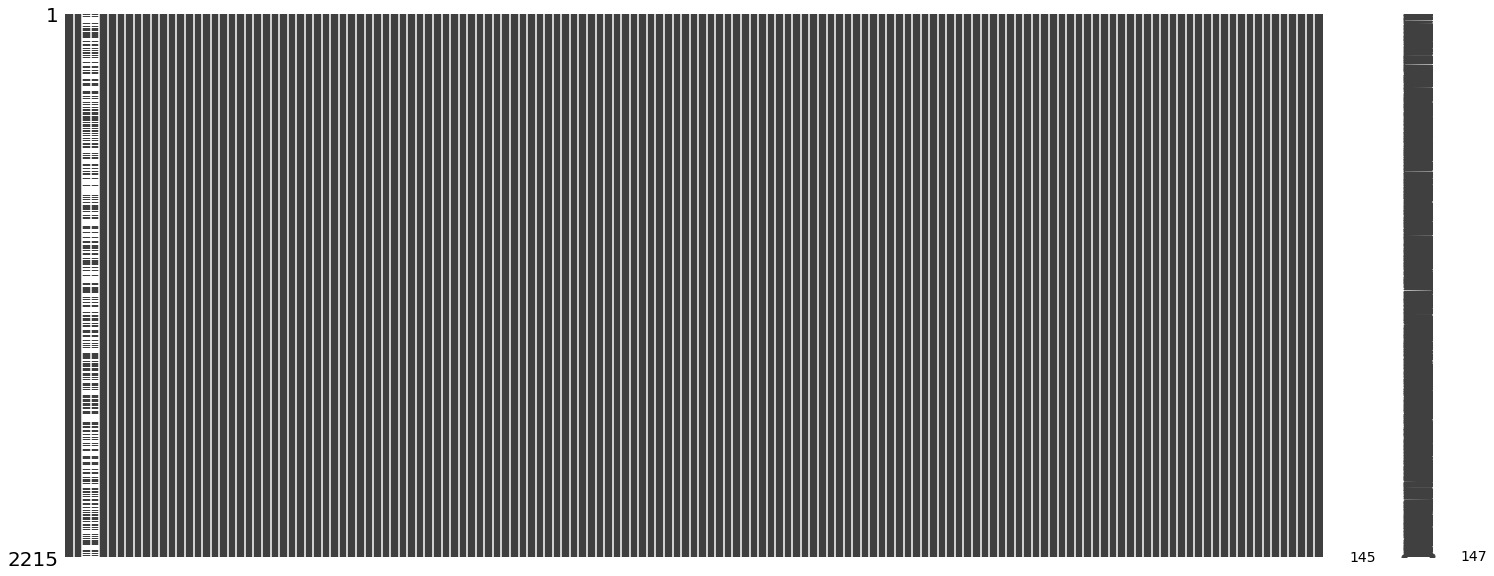

In [7]:
%matplotlib inline
import missingno as msno
msno.matrix(df)

In [34]:
#Adding Regions
regions=[]

for i in df["State"]:
    if i in ['AZ','NM','OK','TX']:
        regions.append('Southwest')
    elif i in ['AR','LA','MS','AL','GA','FL','TN','KY','SC','NC','VA','DC','WV','DE']:
        regions.append('Southeast')
    elif i in ['CA','NV','UT','CO','WY']:
        regions.append('West')
    elif i in ['OR','WA','ID','MT']:
        regions.append('Northwest')
    elif i in ['MD','PA','NJ','CT','RI','NY','MA','NH','VT','ME']:
        regions.append('Northeast')
    else:
        regions.append('Central')
        
#s1['Regions']=regions
df.insert(2,"Region",regions)

<h2>Column Selection</h2>

In [10]:
train_cols = [col for col in df if(
          'communityname' not in col
          and 'State' not in col
          and 'countyCode' not in col
          and 'communityCode' not in col
          and 'fold' not in col
          and col not in ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop']
        )]

pred_cols = ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop']



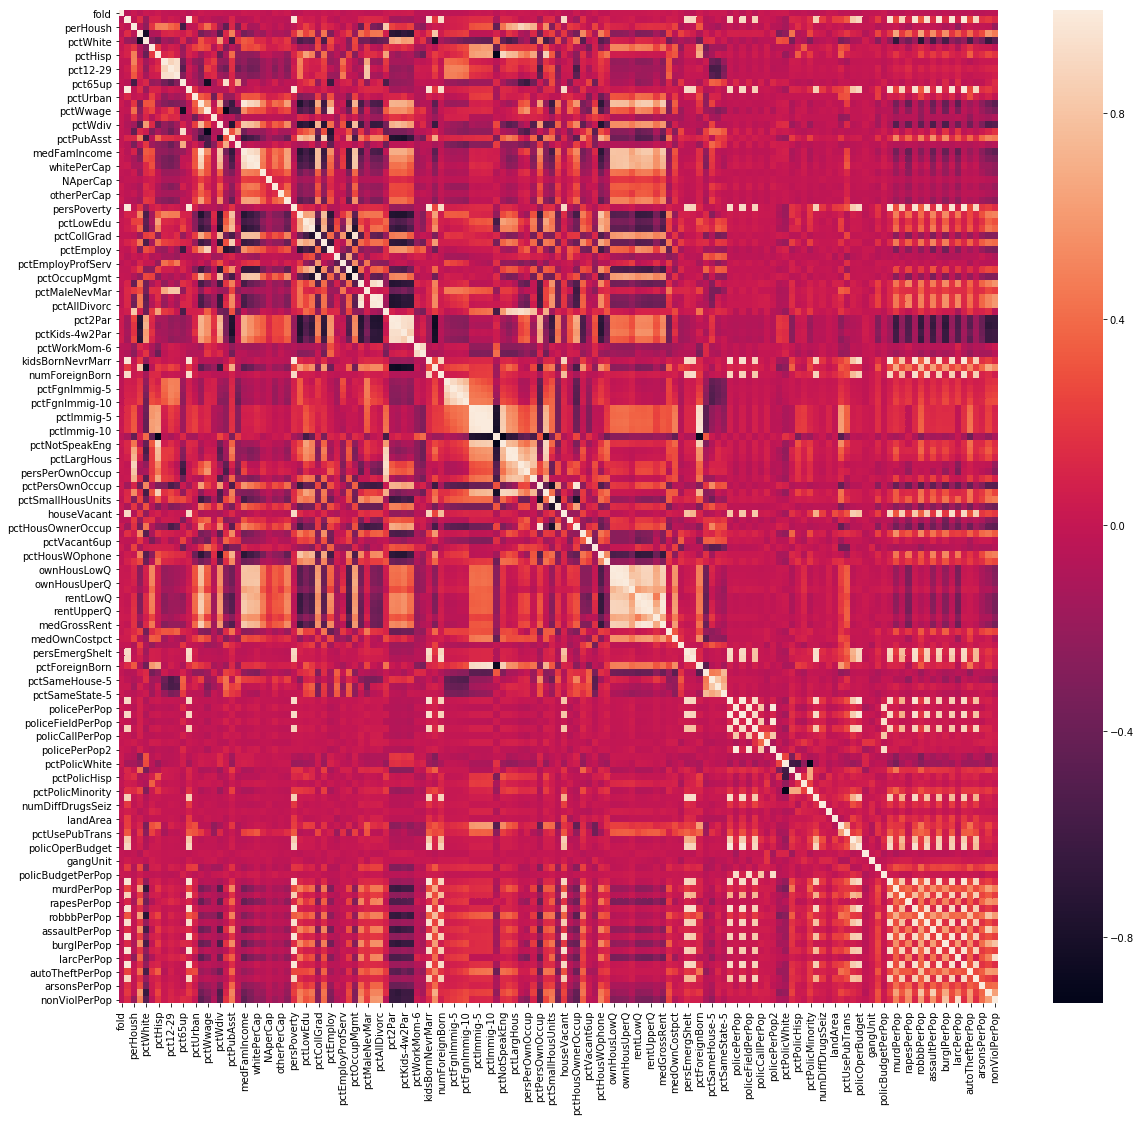

In [11]:
import seaborn as sns
a4_dims = (19.7, 18.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(df.corr())

In [12]:
from bokeh.plotting import figure, output_file, show
p = figure(plot_width=400, plot_height=400, x_axis_label='pctLowEdu', y_axis_label='violentPerPop')
p.circle(df['pctNotSpeakEng'], df['violentPerPop'], size=10, color="navy", alpha=0.5)
show(p)

In [13]:
pd.DataFrame(df.groupby('State')['violentPerPop'].sum()/df.groupby('State')['State'].count()).reset_index().iloc[:,1:2].values.tolist()

[[576.5766666666667],
 [1030.6990697674419],
 [718.5503999999997],
 [551.0945],
 [809.6758742715605],
 [526.8616000000001],
 [269.8525048384591],
 [3048.38],
 [887.29],
 [1159.0468888888886],
 [973.4135135135132],
 [406.4525],
 [271.53000000000003],
 [589.0789217652962],
 [499.96625],
 [874.69],
 [682.5753846153846],
 [1312.7136363636362],
 [442.17225889049246],
 [1217.6991666666665],
 [151.48705882352942],
 [589.0789217652945],
 [579.8337330932188],
 [446.00666666666683],
 [659.8269460882648],
 [973.0360869565214],
 [85.05499999999999],
 [181.72238095238095],
 [409.82350710900477],
 [836.507],
 [552.4159999999999],
 [613.3100000000002],
 [399.57646705883406],
 [487.14750000000004],
 [356.4741935483871],
 [337.3154455445542],
 [340.3826923076923],
 [1233.455714285714],
 [226.4611111111111],
 [723.7714285714286],
 [617.8744662382209],
 [231.43916666666667],
 [514.0330303030303],
 [116.10749999999999],
 [547.4440000000001],
 [180.59516666666667],
 [433.87571428571425],
 [295.865714285714

In [67]:
import pandas as pd
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

init_notebook_mode(connected=True)
cf.go_offline()

import plotly
from plotly import graph_objs as go
#plotly.tools.set_credentials_file(username='danieldenk', api_key='bRq9Iez43j6DWCWQEUAB')

state = df["State"].unique().tolist()
count = df["State"].value_counts().tolist()
states_crimes = 
test_data = [dict(type='choropleth',
                 autocolorscale=False,
                 locations=df['state'],
                 z=df['count'],
                 locationmode='USA-states',
                 marker=dict(
                     line=dict(
                         color='rgb(255,255,255)',
                         width=2
                     )),
                 colorbar=dict(
                     title='Choropleth Map Test')
                 )] 
layout = dict(
            title='Test title',
            geo = dict(
                scope='usa',
                projection=dict(type='albers usa'),
                #snowflakes=True,
                lakecolor='rgb(255,255,255)'),
            )

fig = dict(data=test_data, layout=layout)

pyo.iplot(fig,filename='d3-cloropleth-map')

KeyError: 'state'

In [179]:
#a = pd.DataFrame(df.groupby(df[["State","fold"]]).count(["State"]),columns=["State","fold"]).rename(columns={"State": "State", "fold": "Count"})
print(list(df.groupby(df["State"]).transform('count')))
df

['communityname', 'Region', 'countyCode', 'communityCode', 'fold', 'pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctL

,communityname,State,Region,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,freq
0,BerkeleyHeightstownship,NJ,Northeast,39,5320,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.00,NaN,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59,211
1,Marpletownship,PA,Northeast,45,47616,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.00,NaN,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95,101
2,Tigardcity,OR,Northwest,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.8

In [180]:
df.corr()

,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,freq
fold,1.000000,-0.044338,0.015973,-0.040064,0.022973,0.004439,0.035620,-0.015715,-0.023794,-0.022966,-0.005097,-0.044461,0.001198,0.029295,0.011324,0.008085,0.009008,-0.006205,-0.015450,-0.002043,0.031080,0.017256,0.013720,-0.013918,-0.028077,0.035067,0.011689,0.029497,-0.049518,-0.025349,0.007275,-0.000847,-0.003916,0.015881,-0.000274,0.014107,-0.032363,-0.016000,-0.000418,-0.016177,-0.029114,-0.017760,-0.018401,0.022028,0.043658,0.035016,0.039945,0.049168,-0.050389,-0.043432,-0.047403,-0.039054,-0.041677,-0.034699,-0.024315,-0.029854,-0.022686,0.010670,0.015169,0.012462,0.014863,-0.034604,0.035929,0.010625,0.014622,0.030334,0.028540,0.011317,0.032773,0.013609,-0.023256,0.020395,-0.038453,-0.040307,0.033347,-0.043253,-0.001882,0.042918,-0.022131,-0.018863,0.020241,0.019608,0.020819,0.018212,0.020933,0.025202,0.032544,0.040707,0.026705,0.013513,0.038492,0.005828,-0.043039,-0.039573,0.032971,-0.009527,0.022005,0.014270,0.022897,-0.119346,0.059622,-0.121348,0.058347,-0.138312,0.062888,-0.002980,0.059624,0.082832,0.102856,-0.049017,-0.070985,-0.036271,-0.090370,-0.128773,-0.053388,0.049025,0.008615,-0.032607,-0.017758,-0.105324,-0.107906,-0.031167,-0.024923,-0.003911,0.060087,-0.049480,-0.029179,-0.052620,-0.006191,-0.046286,-0.036033,-0.044414,-0.019807,-0.047018,-0.023988,-0.042677,-0.026570,-0.050421,-0.028004,-0.060711,-0.049423,-0.034274,-0.027070,0.036910
pop,-0.044338,1.000000,-0.018841,0.135641,-0.184685,0.088360,0.094048,-0.007624,0.046247,0.017700,-0.043819,0.999052,0.114299,-0.053239,-0.012735,-0.067177,-0.085930,-0.054248,0.107935,-0.059353,-0.057353,-0.025764,0.028768,-0.026214,-0.009691,-0.036320,-0.025270,-0.051012,0.986054,0.095377,0.043183,0.055649,-0.005842,0.092563,-0.022463,-0.057692,0.011120,-0.010039,-0.008971,0.103749,0.130938,0.126484,0.117451,0.064478,-0.150819,-0.156282,-0.124416,-0.147524,-0.056292,-0.084853,0.963838,0.202929,0.929423,0.060994,0.076186,0.093299,0.109562,0.146032,0.149047,0.154978,0.157155,-0.119491,0.125020,0.114833,0.072863,-0.010585,0.009548,0.026451,-0.158290,0.120898,0.139382,-0.115199,0.916277,-0.032549,-0.161002,0.162563,-0.022624,-0.059052,0.045858,0.084934,0.008126,0.016494,0.031617,0.066210,-0.0057

In [188]:
df.describe

<bound method NDFrame.describe of                 communityname State     Region countyCode communityCode  fold  \
0     BerkeleyHeightstownship    NJ  Northeast         39          5320     1   
1              Marpletownship    PA  Northeast         45         47616     1   
2                  Tigardcity    OR  Northwest        NaN           NaN     1   
3            Gloversvillecity    NY  Northeast         35         29443     1   
4                 Bemidjicity    MN    Central          7          5068     1   
5             Springfieldcity    MO    Central        NaN           NaN     1   
6                 Norwoodtown    MA  Northeast         21         50250     1   
7                Andersoncity    IN    Central        NaN           NaN     1   
8                   Fargocity    ND    Central         17         25700     1   
9                    Wacocity    TX  Southwest        NaN           NaN     1   
10                Shermancity    TX  Southwest        NaN           NaN    

In [226]:
df[['communityname', 'Region', 'pop',  'persUrban', 'medIncome', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'persPerFam',  'kidsBornNevrMarr','numForeignBorn', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup', 'medNumBedrm', 'houseVacant',  'medYrHousBuilt', 'ownHousLowQ', 'ownHousMed', 'ownHousUperQ', 'ownHousQrange', 'rentLowQ', 'rentMed', 'rentUpperQ', 'rentQrange', "persPoverty","pctPoverty","pctLowEdu",'medGrossRent', 'medRentpctHousInc', 'medOwnCostpct', 'medOwnCostPctWO', 'persEmergShelt', 'persHomeless', 'pctForeignBorn', 'pctBornStateResid',  'landArea', 'popDensity', 'murders', 'rapes', 'robberies', 'assaults', 'burglaries', 'larcenies', 'autoTheft', 'arsons']]

,communityname,Region,pop,persUrban,medIncome,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,persPerFam,kidsBornNevrMarr,numForeignBorn,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,medNumBedrm,houseVacant,medYrHousBuilt,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,persPoverty,pctPoverty,pctLowEdu,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,landArea,popDensity,murders,rapes,robberies,assaults,burglaries,larcenies,autoTheft,arsons
0,BerkeleyHeightstownship,Northeast,11980,11980,75122,79584,29711,30233,13600,5725,27101,5115.0,22838,227,3.22,31,1277,2.99,3.00,2.84,3,64,1959,215900,262600,326900,111000,685,1001,1001,316,227,1.96,5.81,1001,23.8,21.1,14.0,11,0,10.66,53.72,6.5,1845.9,0,0.0,1.0,4.0,14.0,138.0,16.0,2.0
1,Marpletownship,Northeast,23123,23123,47917,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.11,43,1920,2.70,2.83,1.96,3,240,1958,136300,164200,199900,63600,467,560,672,205,885,3.98,5.61,627,27.6,20.7,12.5,0,0,8.30,77.17,10.6,2186.7,0,1.0,5.0,24.0,57.0,376.0,26.0,1.0
2,Tigardcity,Northwest,29344,29344,35669,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,2.95,164,1468,2.42,2.69,2.06,3,544,1976,74700,90400,112000,37300,370,428,520,150,1389,4.75,2.80,484,24.1,21.7,11.6,16,0,5.00,44.77,10.6,2780.9,3,6.0,56.0,14.0,274.0,1797.0,136.0,22.0
3,Gloversvillecity,Northeast,16656,0,20580,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,2.98,561,339,2.37,2.51,2.20,3,669,1939,36400,49600,66500,30100,195,250,309,114,2831,17.23,11.05,333,28.7,20.6,14.5,0,0,2.04,88.71,5.2,3217.7,0,10.0,10.0,33.0,225.0,716.0,47.0,NaN
4,Bemidjicity,Central,11245,0,17390,24018,8483,9009,887,4425,3352,3000.0,1328,2855,2.98,402,196,2.35,2.55,2.12,2,333,1958,30600,43200,59500,28900,202,283,362,160,2855,29.99,12.15,332,32.2,23.2,12.9,2,0,1.74,73.75,11.5,974.2,0,NaN,4.0,14.0,91.0,1060.0,91.0,5.0
5,Springfieldcity,Central,140494,140494,21577,27705,11878,12029,7382,10264,10753,7192.0,8104,23223,2.89,1511,2091,2.28,2.37,2.16,2,5119,1966,37700,53900,73100,35400,215,280,349,134,23223,17.78,8.76,340,26.4,17.3,11.7,327,4,1.49,64.35,70.4,1995.7,7,77.0,136.0,449.0,2094.0,7690.0,454.0,134.0
6,Norwoodtown,Northeast,28700,28700,42805,50394,18193,18276,17342,21482,12639,21852.0,22594,1126,3.14,263,2637,2.55,2.89,2.09,3,566,1956,155100,179000,215500,60400,463,669,824,361,1126,4.01,4.49,736,24.4,20.8,12.5,0,0,9.19,77.30,10.9,2643.5,0,4.0,9.0,54.0,110.0,288.0,144.0,17.0
7,Andersoncity,Central,59459,59449,23221,28901,12161,12599,9820,6634,8802,7428.0,6187,10320,2.95,2368,517,2.36,2.42,2.27,2,2051,1954,26300,37000,52400,26100,186,253,325,139,10320,17.98,10.09,338,26.3,15.1,12.2,21,0,0.87,73.70,39.2,1515.3,8,34.0,98.0,128.0,608.0,2250.0,125.0,9.0
8,Fargocity,Central,74111,74115,25326,34269,13554,13727,8852,5344,8011,5332.0,5174,9603,3.00,751,1474,2.32,2.77,1.91,2,1562,1971,54500,70300,93700,39200,241,321,387,146,9603,13.68,5.52,355,25.2,20.7,12.8,125,15,1.99,58.82,30.9,2399.3,0,35.0,16.0,41.0,425.0,3149.0,206.0,8.0
9,Wacocity,Southwest,103590,103590,17852,24058,10195,12126,5715,11313,5770,7320.0,6984,27767,3.11,3537,4793,2.45,2.47,2.44,2,5606,1960,28600,43100,67400,38800,192,281,369,177,27767,28.68,13.01,353,29.6,19.4,13.0,43,4,4.63,75.59,78.5,1319.3,29,141.0,453.0,1043.0,2397.0,6121.0,1070.0,18.0


In [219]:
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row

p1 = figure(plot_width=400, plot_height=400, x_axis_label='perCapInc', y_axis_label='whitePerCap')

p2 = figure(plot_width=400, plot_height=400, x_axis_label='perCapInc', y_axis_label='blackPerCap')

p3 = figure(plot_width=400, plot_height=400, x_axis_label='perCapInc', y_axis_label='asianPerCap')

p1.circle(df['perCapInc'], df['whitePerCap']/100, size=10, color="blue", alpha=0.3)
p2.triangle(df['perCapInc'], df['blackPerCap']/100, size=10, color="green", alpha=0.3)
p3.hex(df['perCapInc'], df['asianPerCap']/100, size=10, color="red", alpha=0.3)
show(row(p1, p2, p3))

In [227]:
p1 = figure(plot_width=400, plot_height=400, x_axis_label='medFamIncome', y_axis_label='whitePerCap')

p2 = figure(plot_width=400, plot_height=400, x_axis_label='medFamIncome', y_axis_label='blackPerCap')

p3 = figure(plot_width=400, plot_height=400, x_axis_label='medFamIncome', y_axis_label='asianPerCap')

p1.circle(df['medFamIncome']/10000, df['whitePerCap']/100, size=10, color="blue", alpha=0.3)
p2.triangle(df['medFamIncome']/10000, df['blackPerCap']/100, size=10, color="green", alpha=0.3)
p3.hex(df['medFamIncome']/10000, df['asianPerCap']/100, size=10, color="red", alpha=0.3)
show(row(p1, p2, p3))

In [225]:
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row


# # persPoverty, pctPoverty, pctLowEdu
# p = figure(x_range=fruits, plot_height=250, title="Fruit Counts")
# p.vbar(x=fruits, top=[5, 3, 4, 2, 4, 6], width=0.9)

# p2.triangle(df['medFamIncome']/10000, df['blackPerCap']/100, size=10, color="green", alpha=0.3)
# p3.hex(df['medFamIncome']/10000, df['asianPerCap']/100, size=10, color="red", alpha=0.3)
# show(row(p1, p2, p3))

p1 = figure(plot_width=400, plot_height=400, x_axis_label='whitePerCap ', y_axis_label='pctLowEdu')

p2 = figure(plot_width=400, plot_height=400, x_axis_label='blackPerCap ', y_axis_label='pctLowEdu ')

p3 = figure(plot_width=400, plot_height=400, x_axis_label='asianPerCap', y_axis_label=' pctLowEdu')

p1.circle( df['whitePerCap']/100, df['pctLowEdu'], size=10, color="blue", alpha=0.3)
p2.triangle( df['blackPerCap']/100,df['pctLowEdu'], size=10, color="green", alpha=0.3)
p3.hex(df['asianPerCap']/100,df['pctLowEdu'],  size=10, color="red", alpha=0.3)
show(row(p1, p2, p3))
